<a href="https://colab.research.google.com/github/TNaingHtwe/GraSPP-25S-climatechange/blob/main/notebooks/Disaster_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EM-DAT Data**

Data source https://public.emdat.be/


In [ ]:
#Created a fork and cloned data from repo to use
import pandas as pd
!git clone https://github.com/TNaingHtwe/GraSPP-25S-climatechange.git
# Load the data from the cloned repo
df = pd.read_excel('GraSPP-25S-climatechange/data/raw/public_emdat_custom_request_2025-05-06_fbc8ee61-93e5-46cb-b9a2-492c362b1411.xlsx')

df["Entry Date"] = pd.to_datetime(df["Entry Date"], errors='coerce')
df["Year"] = df["Entry Date"].dt.year

# Preview
df.head()


Cloning into 'GraSPP-25S-climatechange'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 127 (delta 13), reused 19 (delta 11), pack-reused 98 (from 1)
Receiving objects: 100% (127/127), 5.24 MiB | 26.70 MiB/s, done.
Resolving deltas: 100% (29/29), done.


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
0,2005-0002-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
1,2005-0003-BRA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,NaN,64.09274,"[{""adm2_code"":10760,""adm2_name"":""Criciuma""}]",2005-01-06,2023-09-25,2005
2,2005-0005-IRN,No,tec-mis-exp-exp,Technological,Miscellaneous accident,Explosion (Miscellaneous),Explosion (Miscellaneous),NaN,Appartment,IRN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
3,2005-0007-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
4,2005-0008-ITA,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,ITA,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-03-28,2023-09-25,2005


In [ ]:
# EU countries (use official spellings from the download form)
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
    "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Malta", "Netherlands (Kingdom of the)", "Poland", "Portugal",
    "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

# Other countries of interest
other_countries = [
    "China", "United States", "India", "Russian Federation", "Indonesia",
    "Brazil", "Japan", "Iran", "Canada",'Iran (Islamic Republic of)','United States of America'
]


In [ ]:
# Assign Region label
def assign_region(country):
    if country in eu_countries:
        return "EU"
    elif country in other_countries:
        return country
    else:
        return "Other"

df["Region"] = df["Country"].apply(assign_region)

In [ ]:
df_kyoto = df[(df["Year"] >= 2005) & (df["Year"] <= 2015)]
df_paris = df[(df["Year"] >= 2016) & (df["Year"] <= 2024)]


**Disaster Count by Region**

In [ ]:
print("Disaster count by region (Kyoto):")
print(df_kyoto["Region"].value_counts())

print("\nDisaster count by region (Paris):")
print(df_paris["Region"].value_counts())


Disaster count by region (Kyoto):
Region
China                         666
EU                            462
India                         354
United States of America      278
Indonesia                     225
Russian Federation            128
Brazil                        100
Iran (Islamic Republic of)     99
Japan                          84
Canada                         39
Name: count, dtype: int64

Disaster count by region (Paris):
Region
EU                            399
United States of America      268
China                         261
India                         257
Indonesia                     209
Brazil                        100
Iran (Islamic Republic of)     76
Japan                          70
Russian Federation             67
Canada                         37
Name: count, dtype: int64


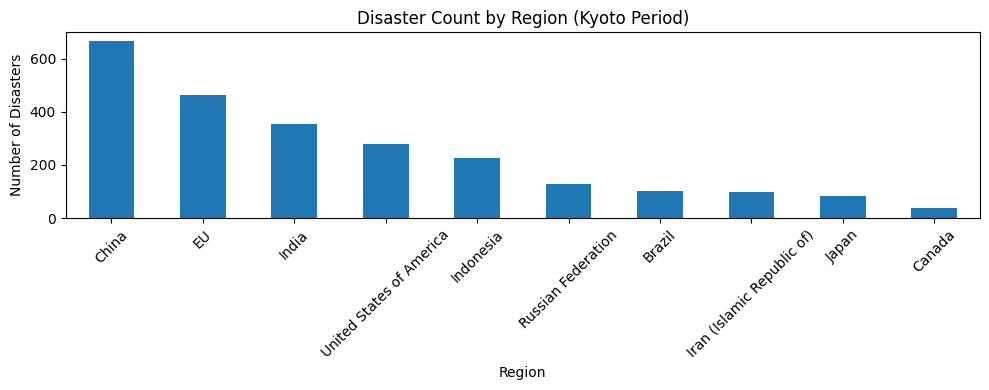

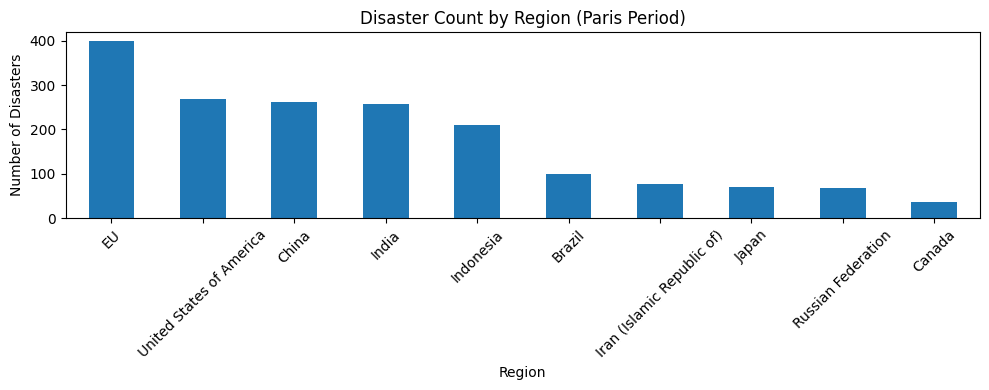

In [ ]:
import matplotlib.pyplot as plt

# Disaster counts
kyoto_counts = df_kyoto["Region"].value_counts()
paris_counts = df_paris["Region"].value_counts()

# Plot Kyoto
kyoto_counts.plot(kind="bar", title="Disaster Count by Region (Kyoto Period)", figsize=(10,4))
plt.ylabel("Number of Disasters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Paris
paris_counts.plot(kind="bar", title="Disaster Count by Region (Paris Period)", figsize=(10,4))
plt.ylabel("Number of Disasters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Damage Count by Region**

In [ ]:
print("\nTotal Damage (Kyoto):")
print(df_kyoto.groupby("Region")["Total Damage ('000 US$)"].sum())

print("\nTotal Damage (Paris):")
print(df_paris.groupby("Region")["Total Damage ('000 US$)"].sum())



Total Damage (Kyoto):
Region
Brazil                         11259500.0
Canada                         11915000.0
China                         289232213.0
EU                             93803419.0
India                          48739247.0
Indonesia                      12943256.0
Iran (Islamic Republic of)      1990262.0
Japan                         242175800.0
Russian Federation              9601666.0
United States of America      490459590.0
Name: Total Damage ('000 US$), dtype: float64

Total Damage (Paris):
Region
Brazil                         30098200.0
Canada                         19735912.0
China                         193477432.0
EU                            124366124.0
India                          64391280.0
Indonesia                       5373000.0
Iran (Islamic Republic of)      7168000.0
Japan                         162205000.0
Russian Federation              1093000.0
United States of America      920499000.0
Name: Total Damage ('000 US$), dtype: float64


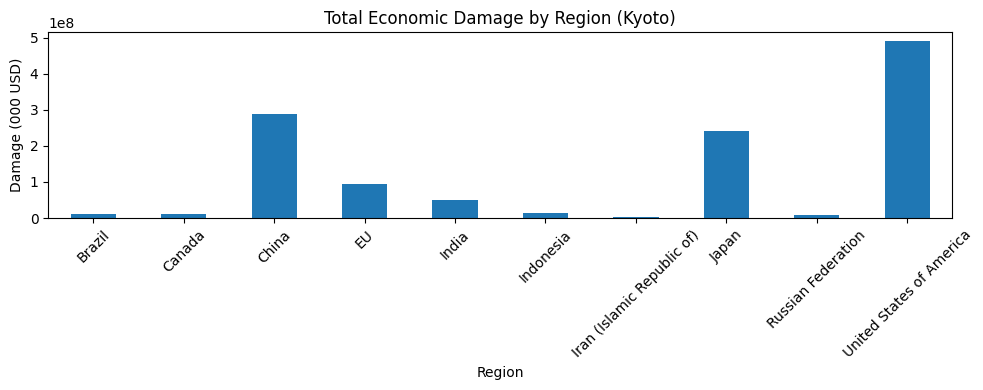

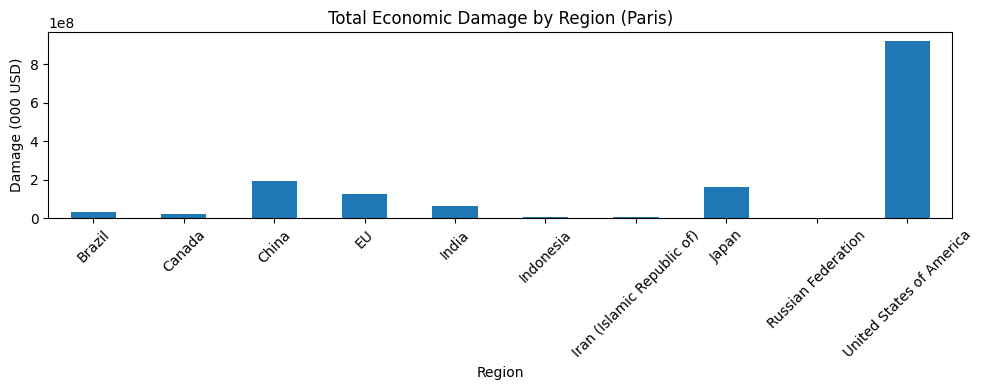

In [ ]:
# Total damage
kyoto_damages = df_kyoto.groupby("Region")["Total Damage ('000 US$)"].sum()
paris_damages = df_paris.groupby("Region")["Total Damage ('000 US$)"].sum()

# Plot
kyoto_damages.plot(kind="bar", title="Total Economic Damage by Region (Kyoto)", figsize=(10,4))
plt.ylabel("Damage (000 USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

paris_damages.plot(kind="bar", title="Total Economic Damage by Region (Paris)", figsize=(10,4))
plt.ylabel("Damage (000 USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


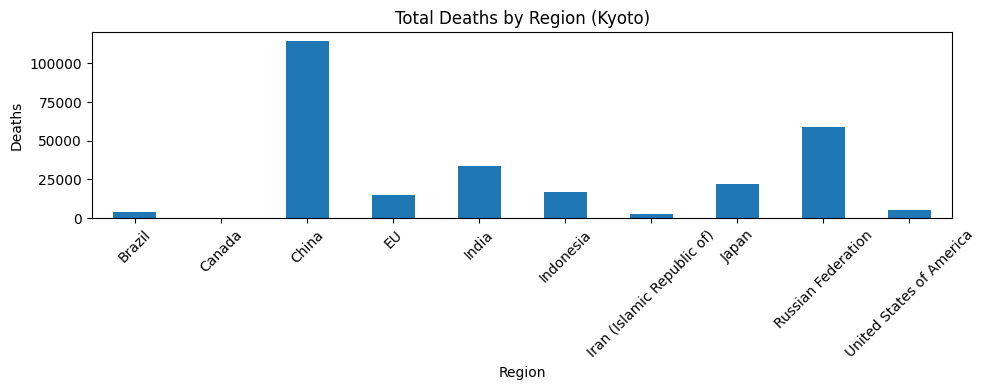

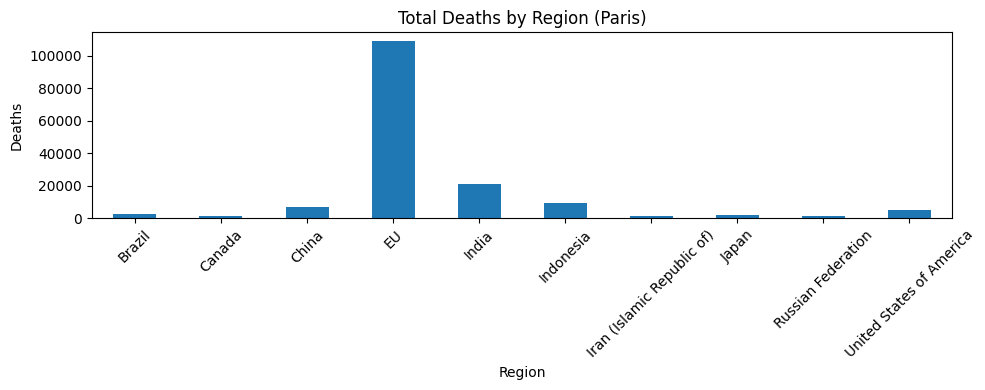

In [ ]:
# Total deaths
kyoto_deaths = df_kyoto.groupby("Region")["Total Deaths"].sum()
paris_deaths = df_paris.groupby("Region")["Total Deaths"].sum()

# Plot
kyoto_deaths.plot(kind="bar", title="Total Deaths by Region (Kyoto)", figsize=(10,4))
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

paris_deaths.plot(kind="bar", title="Total Deaths by Region (Paris)", figsize=(10,4))
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Get a list of all countries in the dataset
all_countries = df["Country"].unique().tolist()

# Combine EU and selected non-EU countries
tracked_countries = eu_countries + other_countries

# Find countries in data that are not in your tracked list
unexpected_countries = [c for c in all_countries if c not in tracked_countries]

# Display them
print("Other countries found in the dataset:")
print(unexpected_countries)

Other countries found in the dataset:
['Russian Federation']
